## Customer Churn Analysis Prediction

Customer Churn
It is when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.

Types of Customer Churn

* Contractual Churn : When a customer is under a contract for a service and decides to cancel the service e.g. Cable TV, SaaS.
* Voluntary Churn : When a user voluntarily cancels a service e.g. Cellular connection.
* Non-Contractual Churn : When a customer is not under a contract for a service and decides to cancel the service e.g. Consumer Loyalty in retail stores.
* Involuntary Churn : When a churn occurs without any request of the customer e.g. Credit card expiration.

Reasons for Voluntary Churn

* Lack of usage
* Poor service
* Better price

Link dataset: https://www.kaggle.com/datasets/suraj520/telecom-churn-dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('telecom_churn.csv')
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [2]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


### EDA

To find the number of churners and non-churners in the dataset

In [3]:
df['churn'].value_counts()

churn
0    194726
1     48827
Name: count, dtype: int64

To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners.

In [4]:
print(df.groupby('churn')['calls_made'].mean())

churn
0    48.985590
1    49.110083
Name: calls_made, dtype: float64


To find out if one State has more churners compared to another.

In [5]:
print(df.groupby('state')['churn'].value_counts())

state              churn
Andhra Pradesh     0        6932
                   1        1717
Arunachal Pradesh  0        7015
                   1        1742
Assam              0        6812
                   1        1735
Bihar              0        6938
                   1        1695
Chhattisgarh       0        6991
                   1        1686
Goa                0        6959
                   1        1735
Gujarat            0        6886
                   1        1724
Haryana            0        6989
                   1        1751
Himachal Pradesh   0        6910
                   1        1772
Jharkhand          0        6906
                   1        1849
Karnataka          0        7013
                   1        1832
Kerala             0        7021
                   1        1704
Madhya Pradesh     0        7020
                   1        1797
Maharashtra        0        7064
                   1        1756
Manipur            0        6911
                  

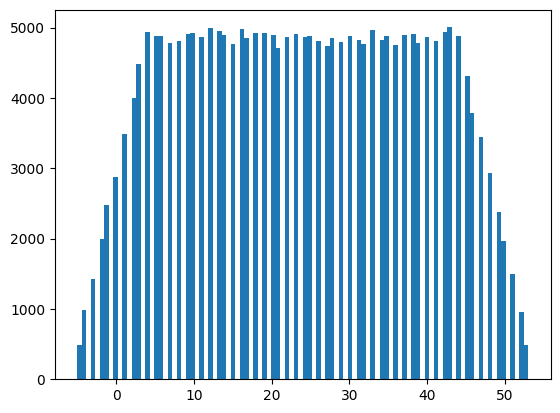

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['sms_sent'], bins=100)
plt.show()

In [8]:
churn_data = df[df['churn']==1]['telecom_partner']
non_churn_data = df[df['churn']==0]['telecom_partner']

In [9]:
churn_data

2             Vodafone
3                 BSNL
7                 BSNL
10              Airtel
16            Vodafone
              ...     
243523    Reliance Jio
243527            BSNL
243529    Reliance Jio
243533    Reliance Jio
243535            BSNL
Name: telecom_partner, Length: 48827, dtype: object

In [10]:
company_names = list(churn_data.value_counts().keys())
company_names

['Airtel', 'Reliance Jio', 'Vodafone', 'BSNL']

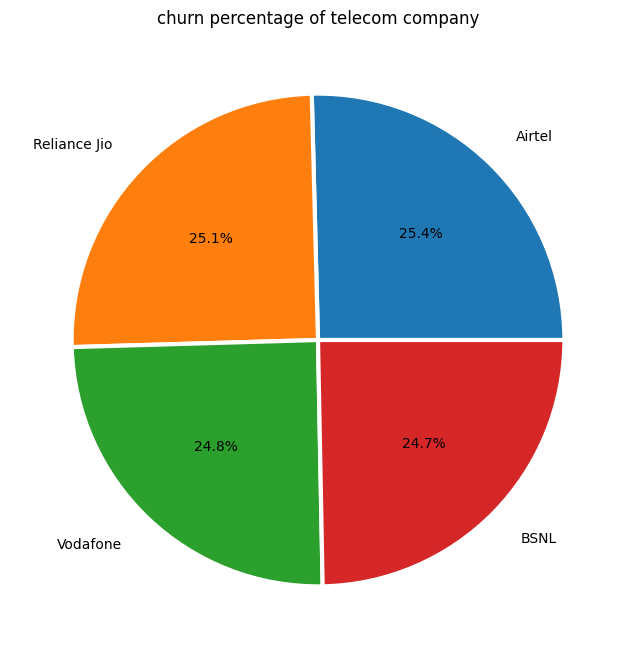

In [11]:
plt.figure(figsize=(10,8))
company_churn_values = list(churn_data.value_counts())
plt.pie(company_churn_values, labels=company_names,
        autopct = '%.1f%%', labeldistance=1.15, wedgeprops={ 'linewidth' : 3, 'edgecolor' : 'white'})

plt.title("churn percentage of telecom company")
plt.show()

### Label Encoding

Many Machine Learning models make certain assumptions about how the data is distributed. Some of the assumptions are as follows:

* The features are normally distributed
* The features are on the same scale
* The datatypes of features are numeric

In telco churn data, Churn, Voice mail plan, and, International plan, in particular, are binary features that can easily be converted into 0’s and 1’s

In [12]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=model.fit_transform(df[i])

In [13]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,4,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,5,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


In [15]:
from sklearn.model_selection import train_test_split
x = df.drop("churn",axis=1)
y = df["churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

In [16]:
# To scale features of the training and test sets
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Use Random Forest 

In [17]:
# To train a Random Forest classifier model on the training set.
# import Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier()

# rfc fit the training data
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = rfc.predict(x_test)

In [19]:
# compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7997290121260231

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[58432     1]
 [14632     1]]
